In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount("/content/drive")


MessageError: Error: credential propagation was unsuccessful

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AI project/Unsupervised/Customer Data.csv")

In [ ]:
plt.rcParams['figure.figsize'] = [25, 8]

In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.dtypes.value_counts()

float64    14
int64       3
object      1
dtype: int64

<Axes: >

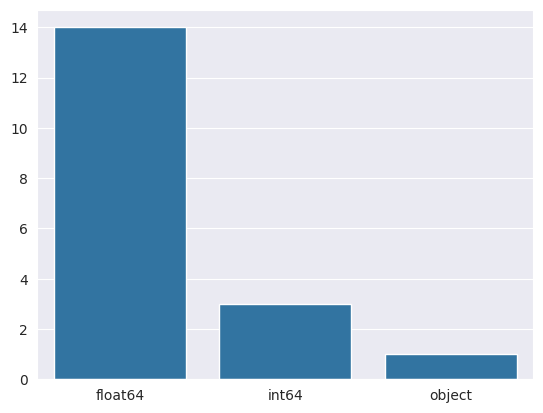

In [ ]:
sns.set_style('darkgrid')
sns.barplot(df.dtypes.value_counts())

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
miss_percentage = df.isnull().sum()/df.shape[0]*100
miss_percentage

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

<Axes: >

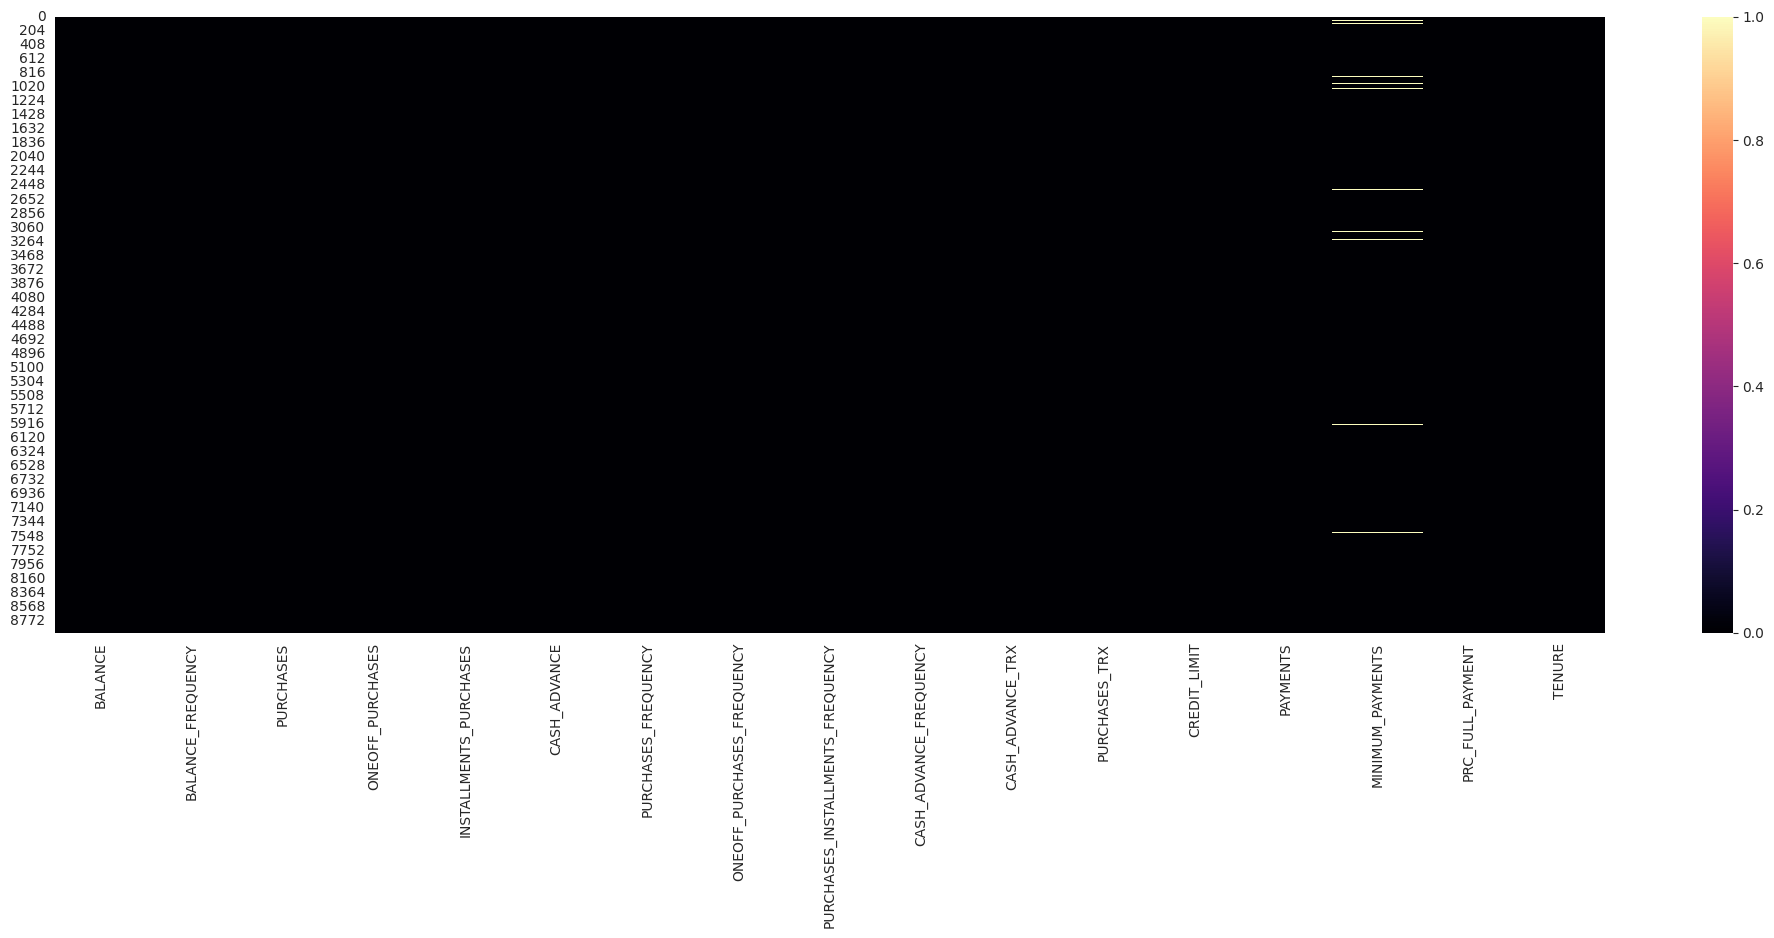

In [ ]:
plt.figure(figsize =(25,8))
sns.heatmap(df.isnull(),cmap='magma')

<Axes: >

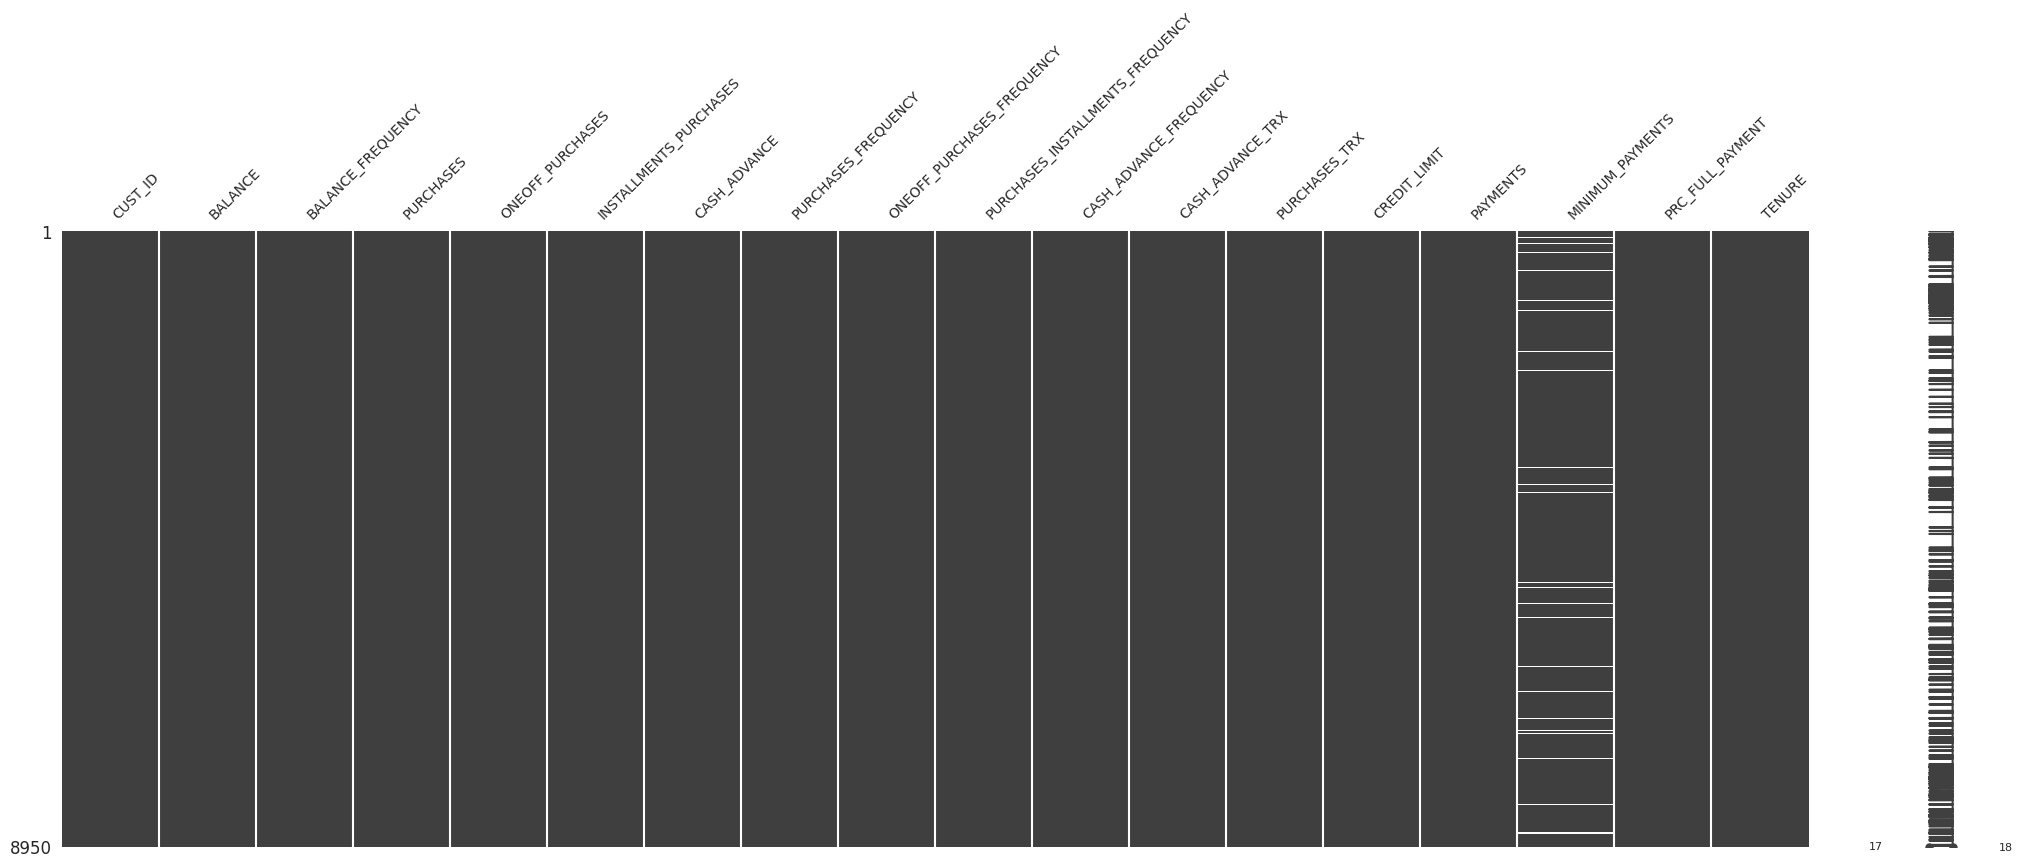

In [ ]:

msno.matrix(df,figsize=(25,8),fontsize=10)

In [ ]:
col_name =df.columns
col_name

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

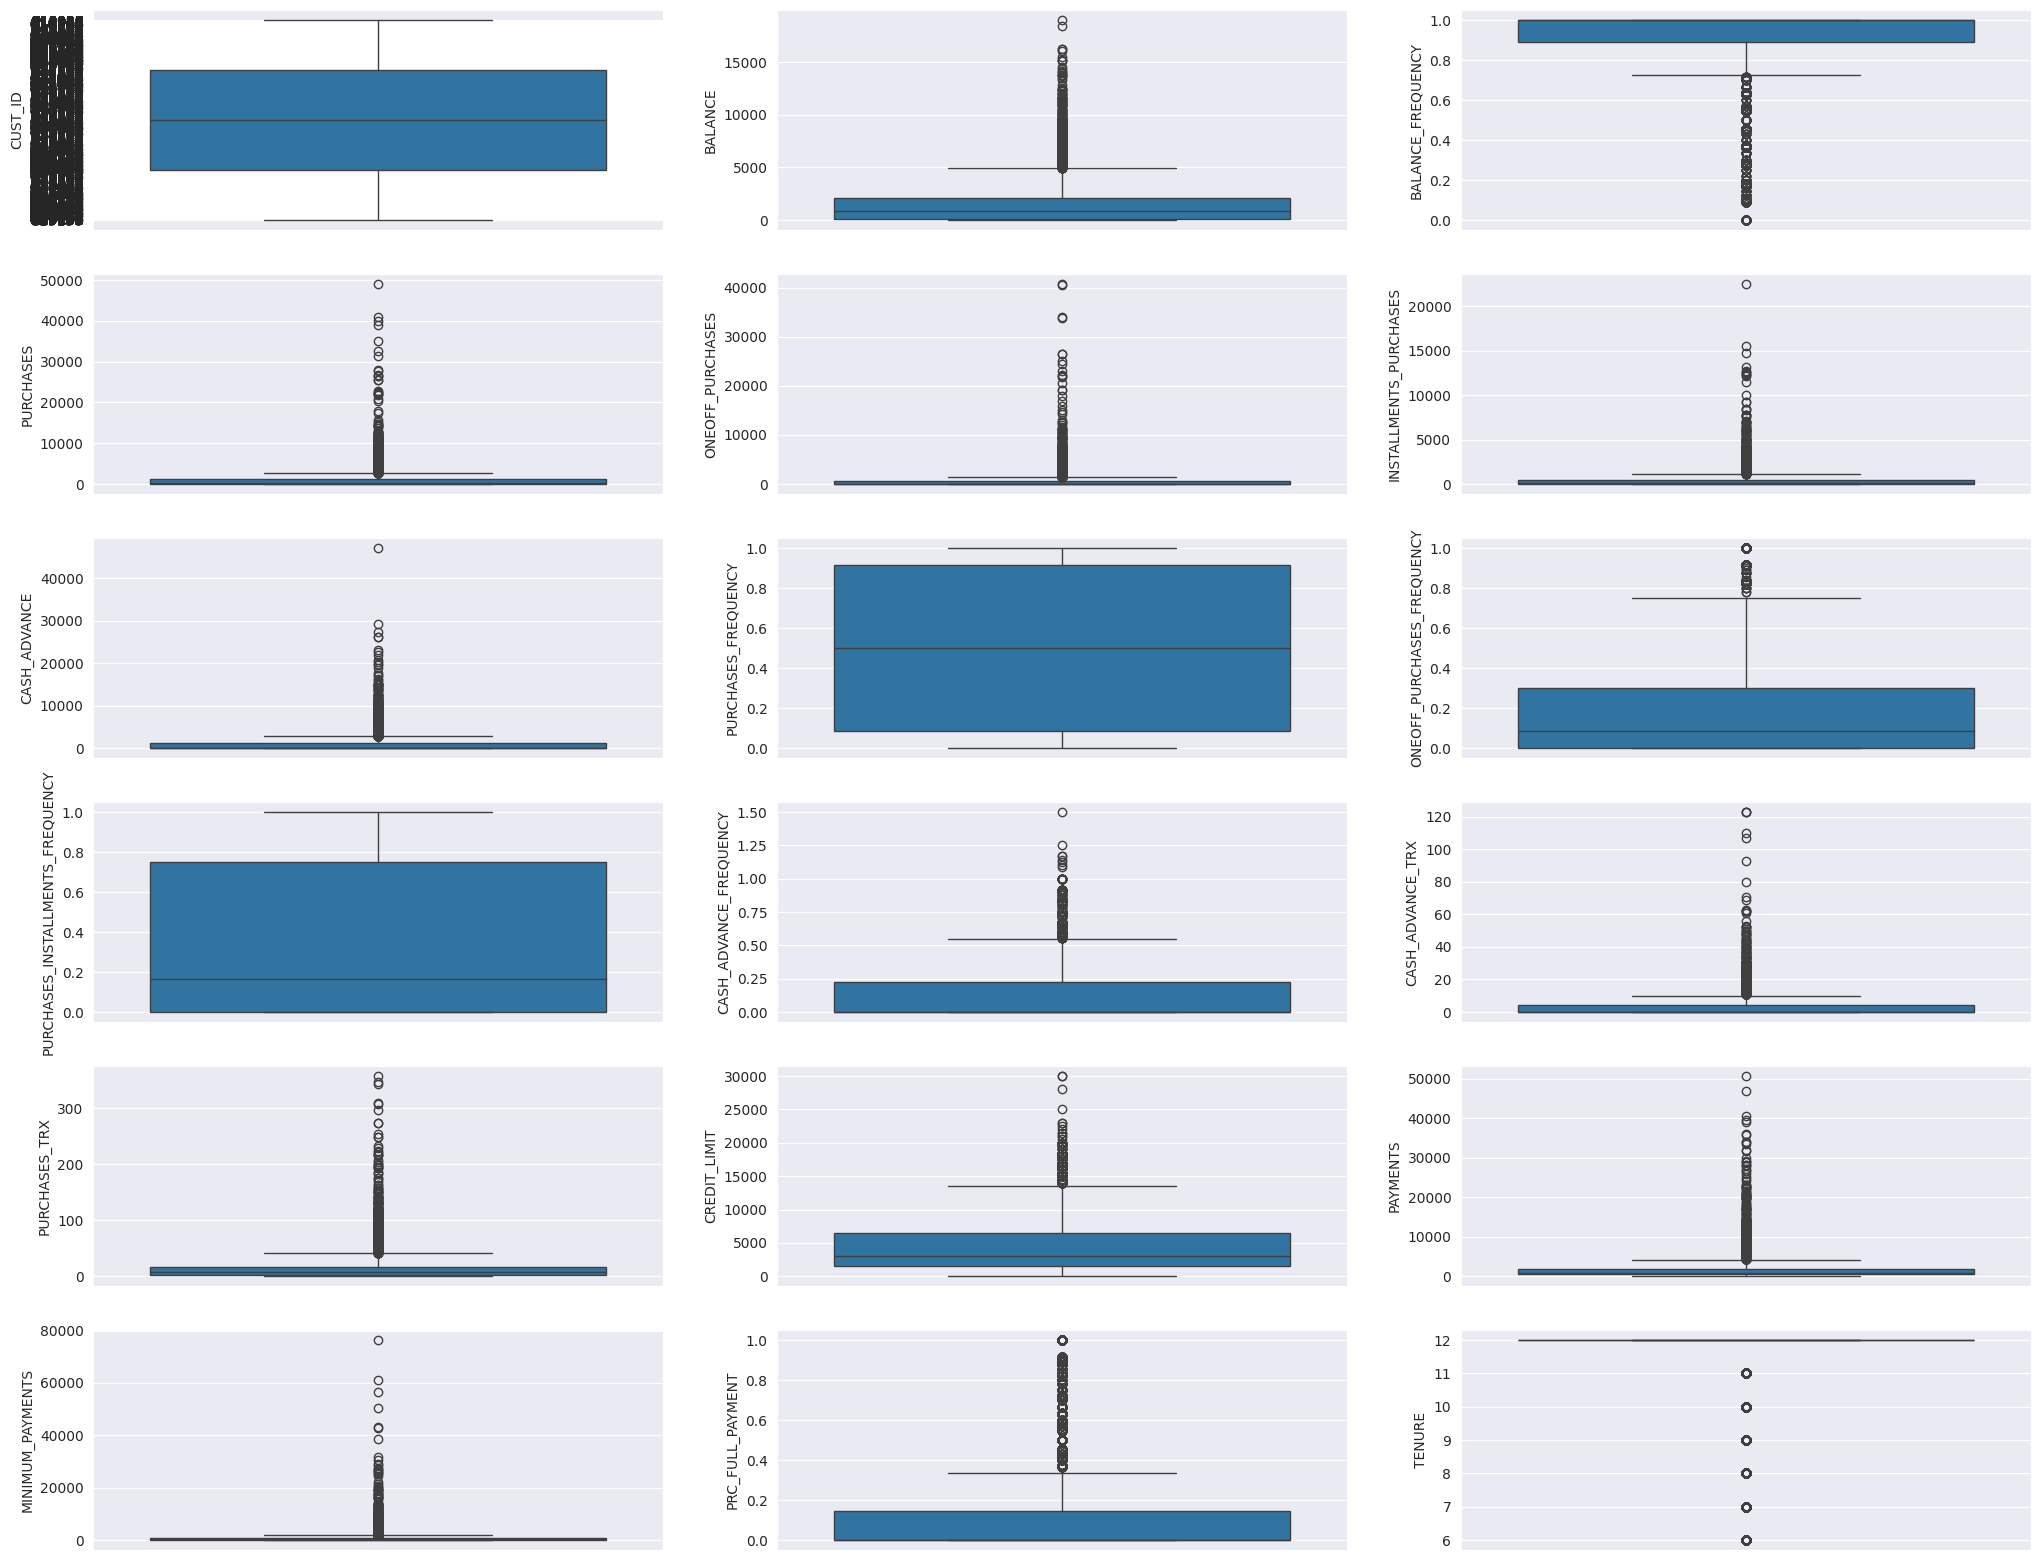

In [ ]:
plt.figure(figsize=(25,20))
for i,col in enumerate(col_name):
  plt.subplot(6,3,i+1)
  sns.boxplot(df[col])

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

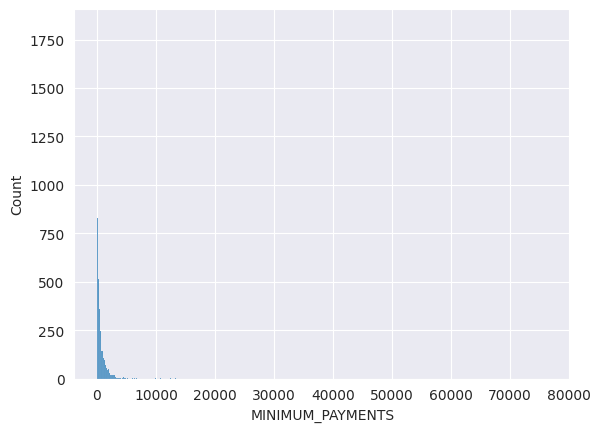

In [ ]:
sns.histplot(df['MINIMUM_PAYMENTS'])

Zscore

In [ ]:
# upperlimit = df['MINIMUM_PAYMENTS'].mean()+3*df['MINIMUM_PAYMENTS'].std()
# lowerlimit = df['MINIMUM_PAYMENTS'].mean()-3*df['MINIMUM_PAYMENTS'].std()
# print('Upperlimit',upperlimit ,
#       'lowerlimit',lowerlimit)

In [ ]:
# df['MINIMUM_PAYMENTS'].std()

In [ ]:
# outlier = df.loc[(df['MINIMUM_PAYMENTS'] > upperlimit) | (df['MINIMUM_PAYMENTS'] < lowerlimit)]
# outlier

In [ ]:
# df_new = df.copy()
# df_new.loc[(df_new['MINIMUM_PAYMENTS'] > upperlimit),'MINIMUM_PAYMENTS' ]= upperlimit
# df_new.loc[(df_new['MINIMUM_PAYMENTS'] < lowerlimit),'MINIMUM_PAYMENTS' ]= lowerlimit

In [ ]:
df_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12.000000
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,7.502326
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,7.502326
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,7.502326
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,7.502326


<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

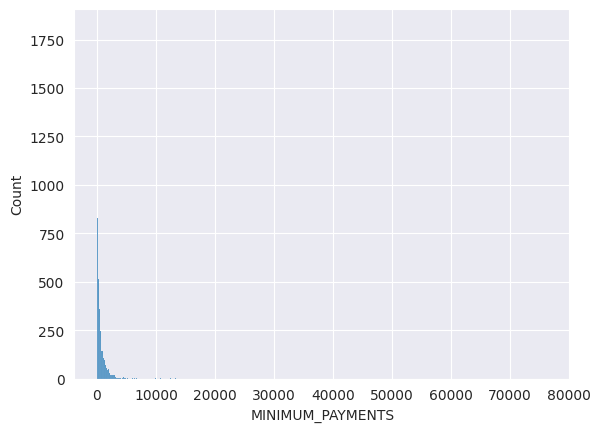

<Axes: ylabel='MINIMUM_PAYMENTS'>

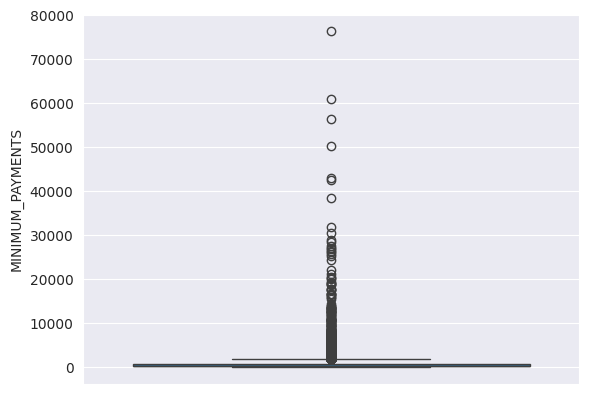

In [ ]:
df = df.drop('CUST_ID',axis=1)

In [ ]:
df_new = df.copy()
for i,col in enumerate(df.columns):
  print (col)
  upperlimit = df[col].mean()+3*df[col].std()
  lowerlimit = df[col].mean()-3*df[col].std()
  print('Upperlimit for feature',col,'is',upperlimit)
  print('lowerlimit for feature',col,'is',lowerlimit)
  outlier = df.loc[(df[col]>upperlimit)|(df[col]<lowerlimit)]
  print('Total no of outlier in feature',col,'is',outlier.shape)

  df_new.loc[df_new[col]> upperlimit, col]= upperlimit
  df_new.loc[df_new[col]< lowerlimit, col]= lowerlimit
  print(df[col].mean())
  print(df_new[col].mean())

BALANCE
Upperlimit for feature BALANCE is 7809.070466047764
lowerlimit for feature BALANCE is -4680.120810691564
Total no of outlier in feature BALANCE is (196, 17)
1564.4748276781006
1517.3586790221634
BALANCE_FREQUENCY
Upperlimit for feature BALANCE_FREQUENCY is 1.5879827336408978
lowerlimit for feature BALANCE_FREQUENCY is 0.16655871753228646
Total no of outlier in feature BALANCE_FREQUENCY is (176, 17)
0.8772707255865921
0.8794766336632047
PURCHASES
Upperlimit for feature PURCHASES is 7413.10917913822
lowerlimit for feature PURCHASES is -5406.699512099113
Total no of outlier in feature PURCHASES is (135, 17)
1003.2048335195531
916.540567506554
ONEOFF_PURCHASES
Upperlimit for feature ONEOFF_PURCHASES is 5572.101123263154
lowerlimit for feature ONEOFF_PURCHASES is -4387.226381363713
Total no of outlier in feature ONEOFF_PURCHASES is (122, 17)
592.4373709497207
523.0388454791178
INSTALLMENTS_PURCHASES
Upperlimit for feature INSTALLMENTS_PURCHASES is 3124.0819902188823
lowerlimit for f

<Figure size 2500x800 with 0 Axes>

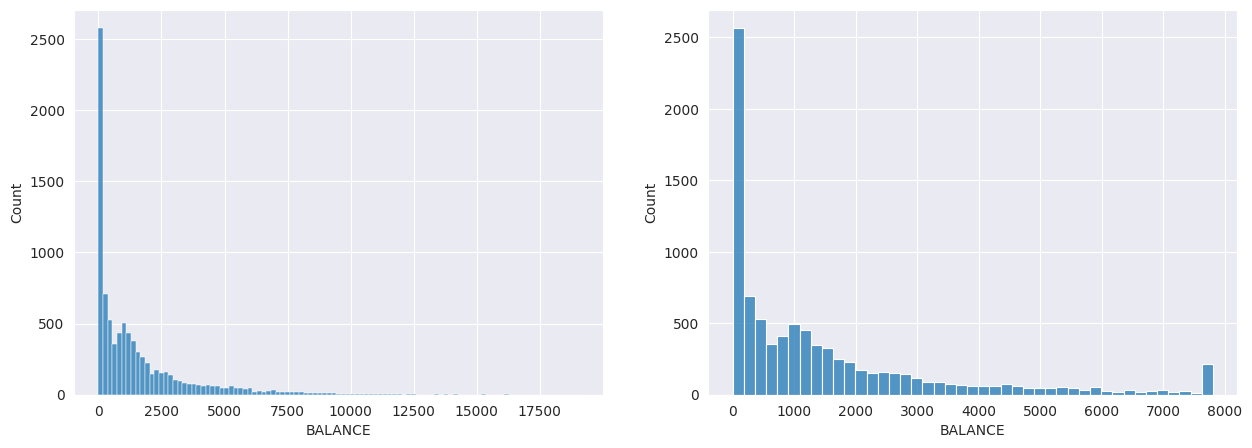

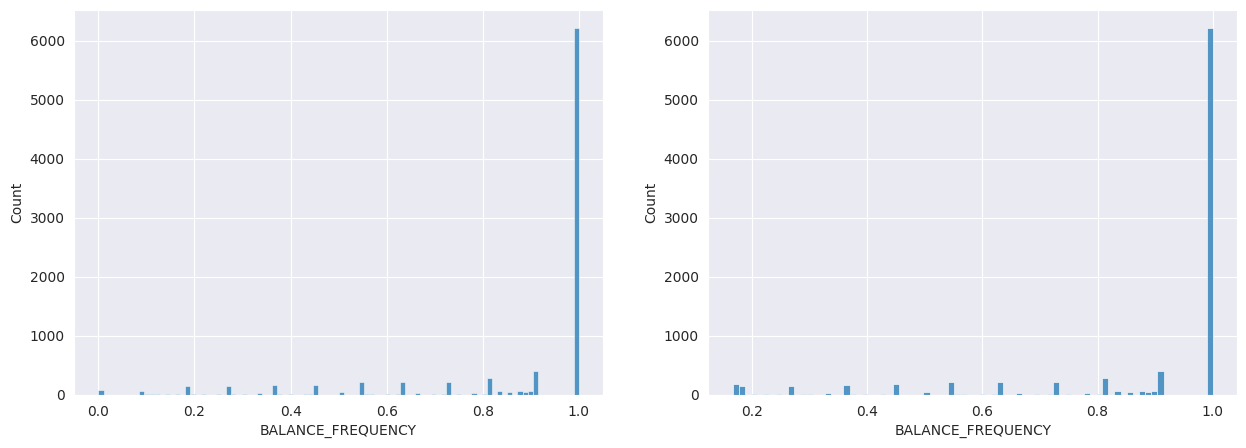

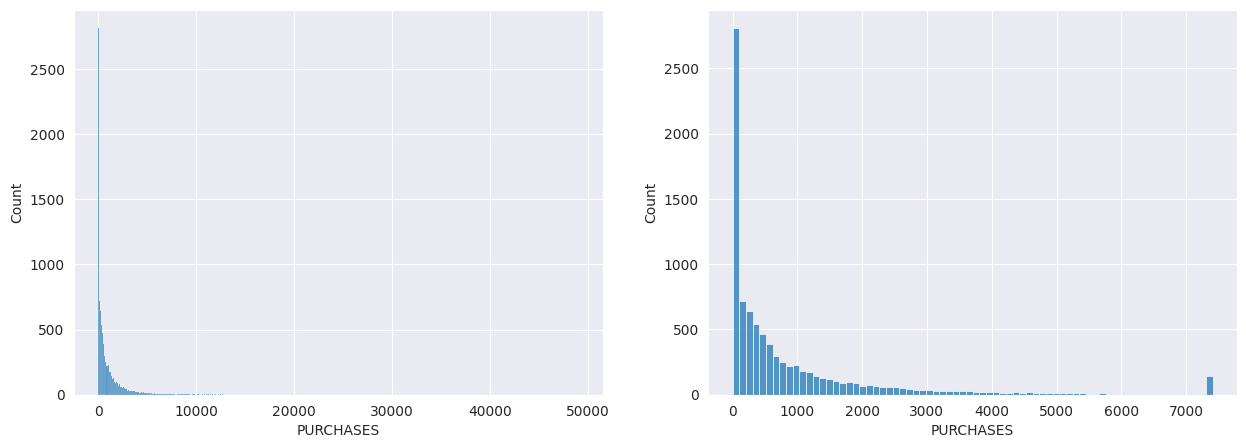

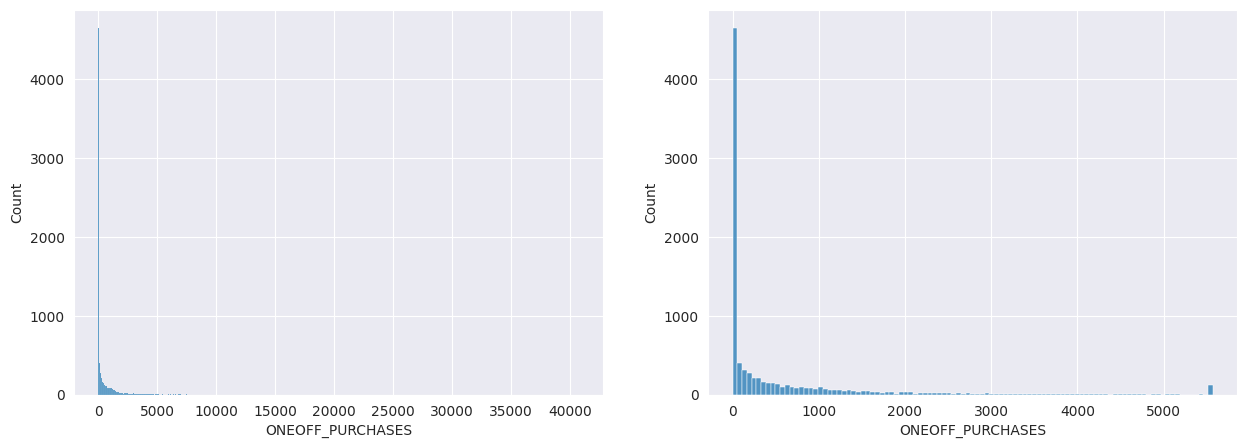

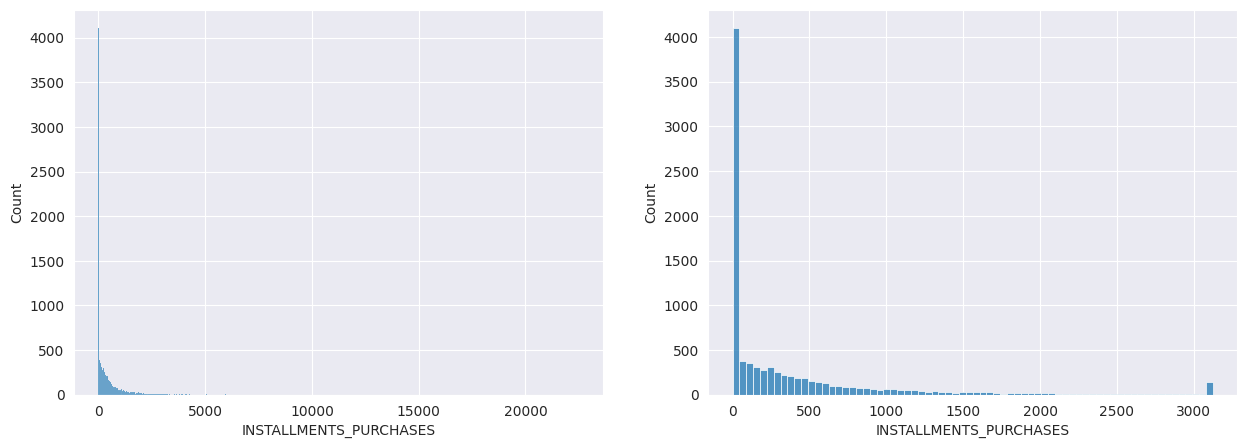

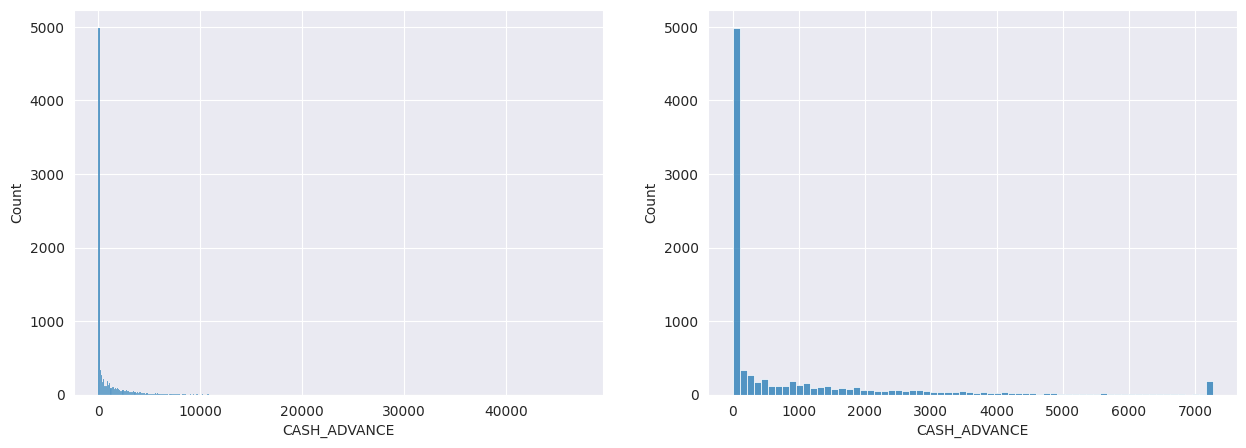

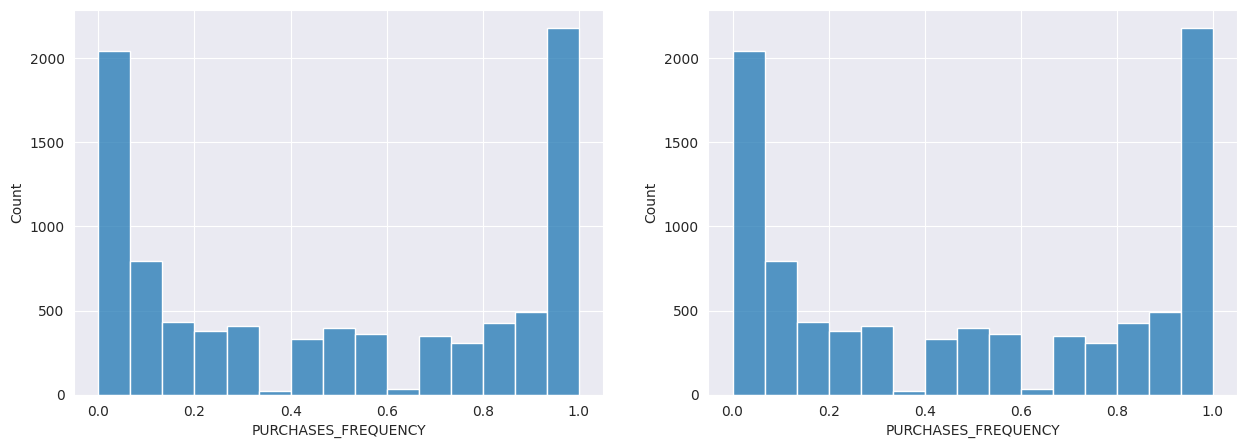

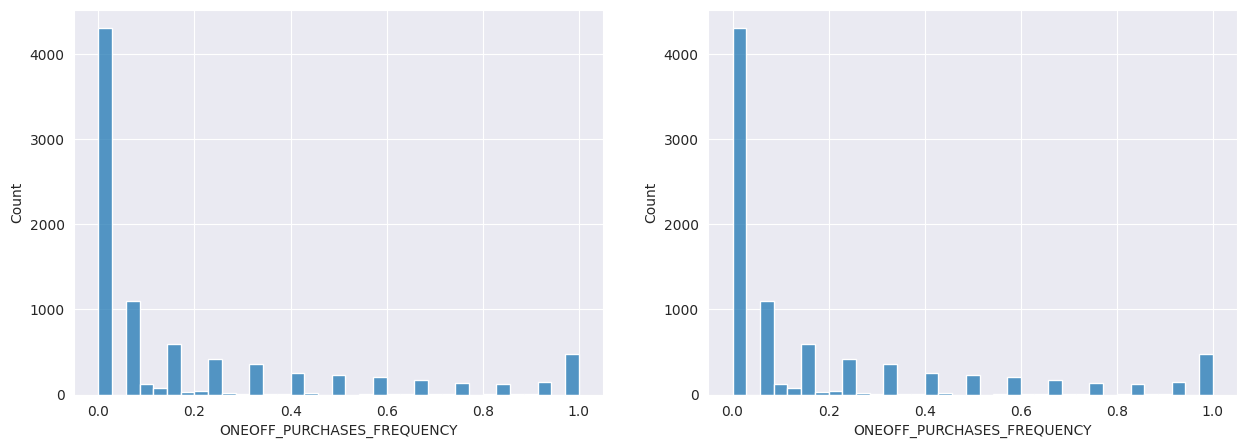

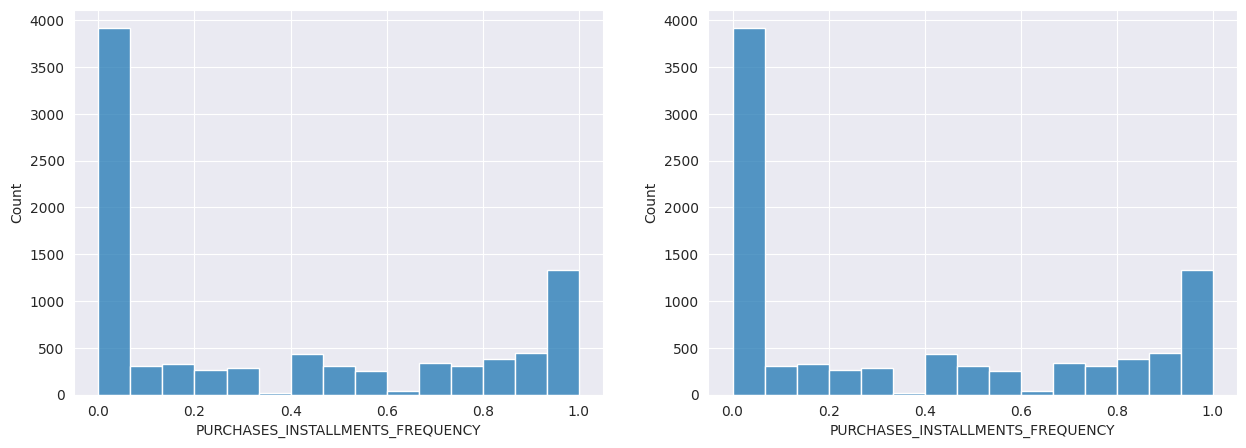

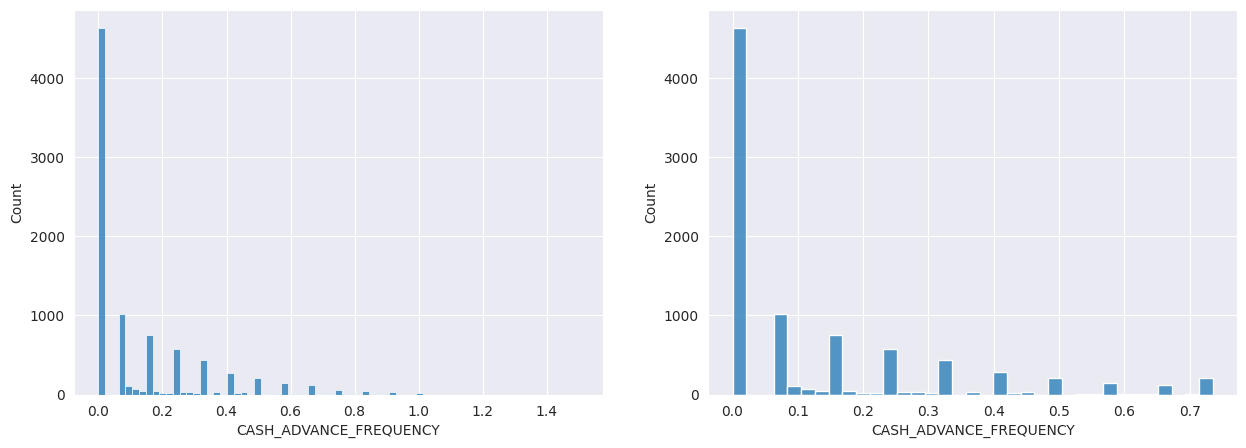

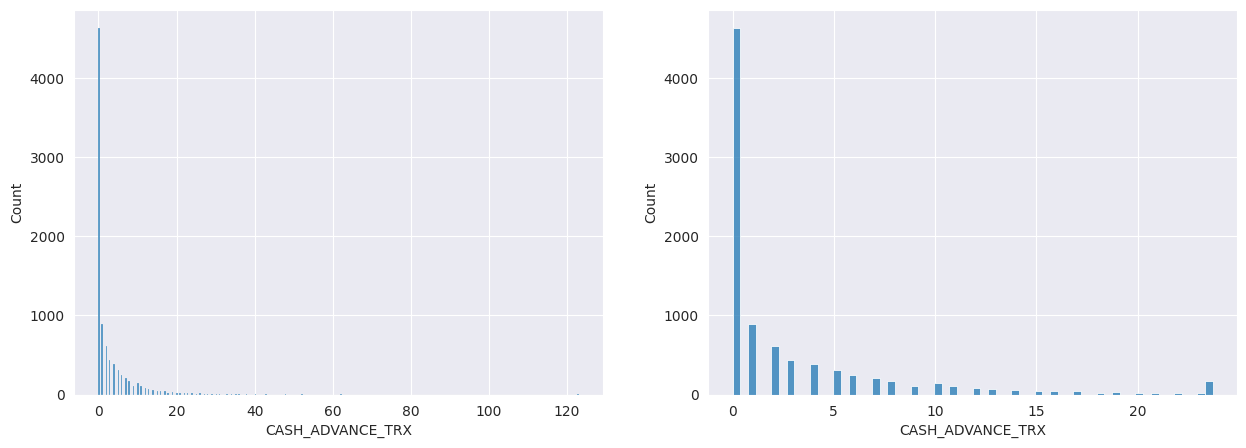

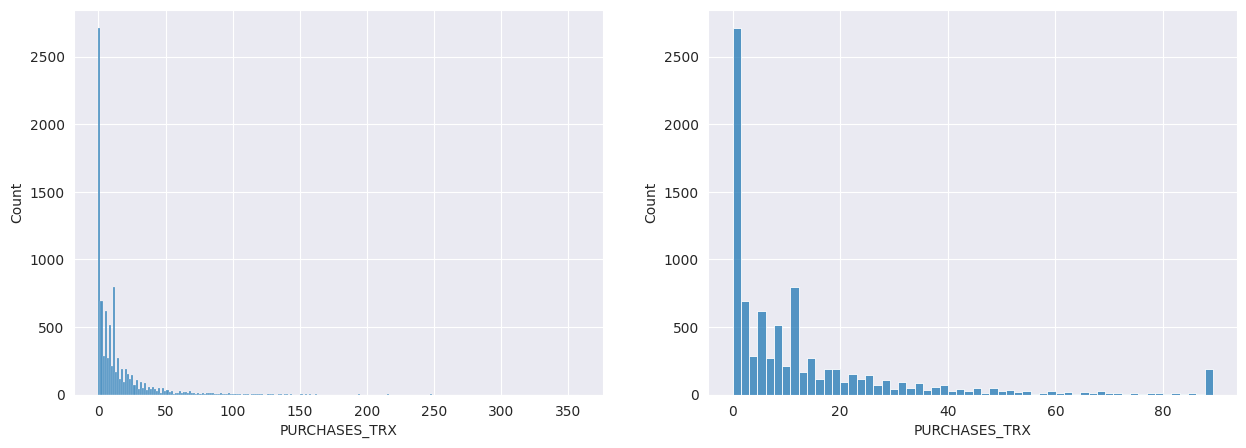

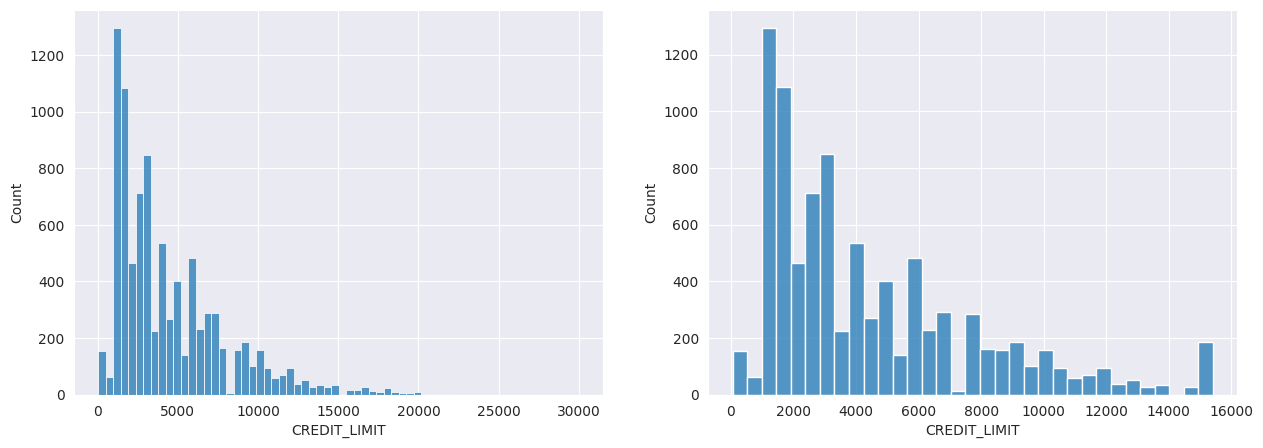

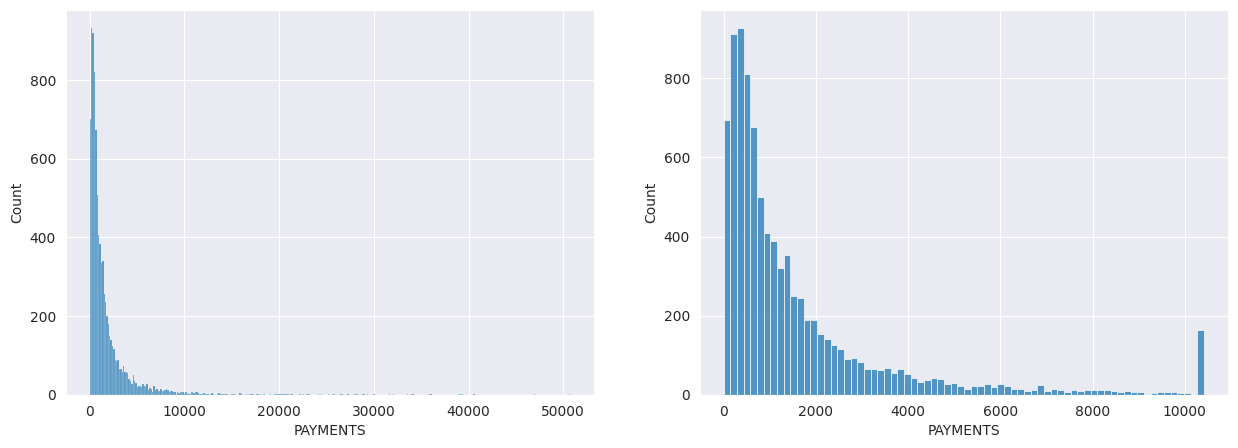

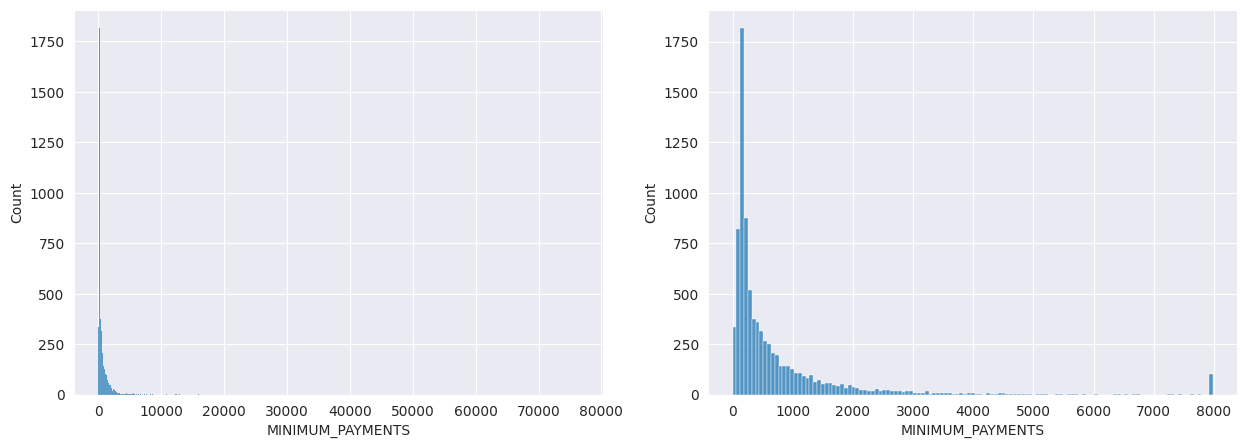

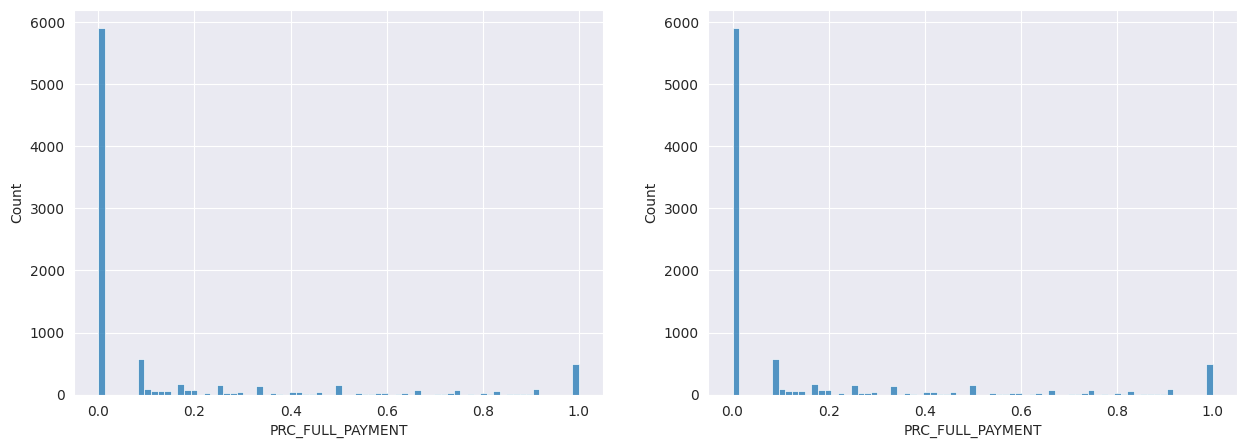

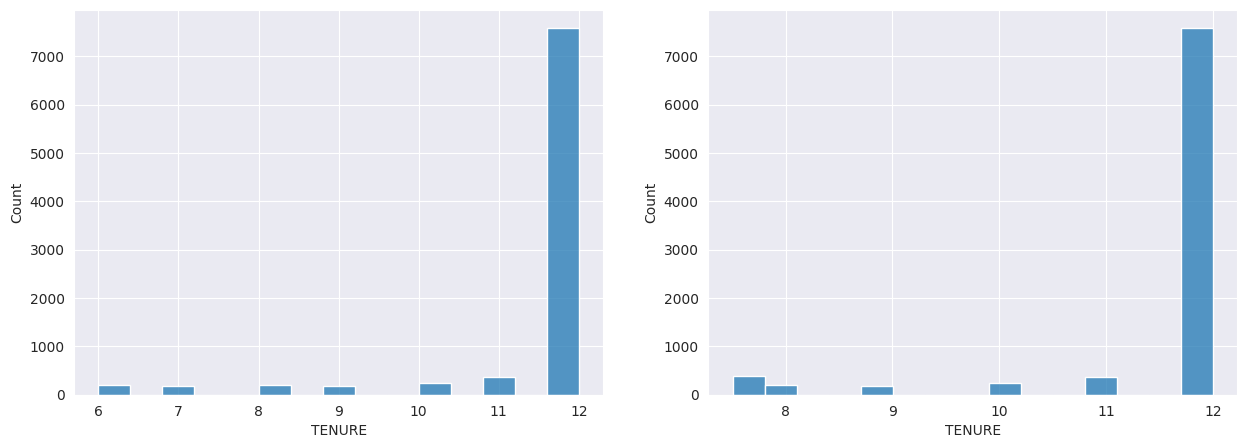

In [ ]:
plt.figure(figsize=(25,8))
for i, col in enumerate (df.columns):
  fig, axes = plt.subplots(1, 2,figsize=(15, 5))
  sns.histplot(df[col],ax=axes[0])

  sns.histplot(df_new[col],ax=axes[1])



In [ ]:
df_new['CREDIT_LIMIT'] = df_new['CREDIT_LIMIT'].fillna(df_new['CREDIT_LIMIT'].mean())

In [ ]:
X_minimum = df_new.drop('MINIMUM_PAYMENTS',axis = 1)
X_minimum

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,0.000000,12.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,0.222222,12.000000
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,0.000000,12.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,0.000000,12.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,0.000000,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,0.500000,7.502326
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,0.000000,7.502326
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,0.250000,7.502326
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,0.250000,7.502326


In [ ]:
y= df_new['MINIMUM_PAYMENTS']

In [ ]:
x_minimumtrain = df_new.dropna(axis=0)
print(df_new.shape)
print(x_minimumtrain.shape)

(8950, 17)
(8637, 17)


In [ ]:
x_minimumtest = df_new[df_new.isnull().any(axis=1)]
x_minimumtest.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,NaN,0.0,12.0
45,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2.0,5.0,2400.0,0.000000,NaN,0.0,12.0
47,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7.0,0.0,4200.0,0.000000,NaN,0.0,12.0
54,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0.0,8.0,1000.0,417.016763,NaN,0.0,12.0
55,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0.0,6.0,6000.0,0.000000,NaN,0.0,12.0


In [ ]:
y_minimumtrain = x_minimumtrain['MINIMUM_PAYMENTS']
y_minimumtrain.shape

(8637,)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_minimumtrain.drop('MINIMUM_PAYMENTS',axis=1),y_minimumtrain)

RandomForestRegressor()

In [ ]:
predictions=rf.predict(x_minimumtest.drop('MINIMUM_PAYMENTS',axis=1))
predictions_df = pd.DataFrame(predictions, columns=['MINIMUM_PAYMENTS'],index=x_minimumtest.index)
predictions_df

,MINIMUM_PAYMENTS
3,5448.097205
45,7499.046272
47,7476.512459
54,21.472608
55,5720.708947
...,...
8919,73.109911
8929,395.576348
8935,397.282787
8944,152.821187


In [ ]:
x_minimumtest['MINIMUM_PAYMENTS'] = predictions_df['MINIMUM_PAYMENTS']

<ipython-input-123-d0125a759ba4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_minimumtest['MINIMUM_PAYMENTS'] = predictions_df['MINIMUM_PAYMENTS']


In [ ]:
df_new2 = pd.concat([x_minimumtrain,x_minimumtest])

In [ ]:
df_new2.head(50)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,2.00000,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.000000,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.000000,0.00000,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.170000,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.00000,7500.0,622.066742,627.284787,0.000000,12.0
4,817.714335,1.000000,16.00,16.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,1.00000,1200.0,678.334763,244.791237,0.000000,12.0
5,1809.828751,1.000000,1333.28,0.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.000000,8.00000,1800.0,1400.057770,2407.246035,0.000000,12.0
6,627.260806,1.000000,7091.01,5572.101123,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,64.00000,13500.0,6354.314328,198.065894,1.000000,12.0
7,1823.652743,1.000000,436.20,0.000000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12.00000,2300.0,679.065082,532.033990,0.000000,12.0
8,1014.926473,1.000000,861.49,661.490000,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.000000,5.00000,7000.0,688.278568,311.963409,0.000000,12.0
9,152.225975,0.545455,1281.60,1281.600000,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,3.00000,11000.0,1164.770591,100.302262,0.000000,12.0
10,1293.124939,1.000000,920.12,0.000000,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12.00000,1200.0,1083.301007,2172.697765,0.000000,12.0


In [ ]:
df_new2.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='PURCHASES'>

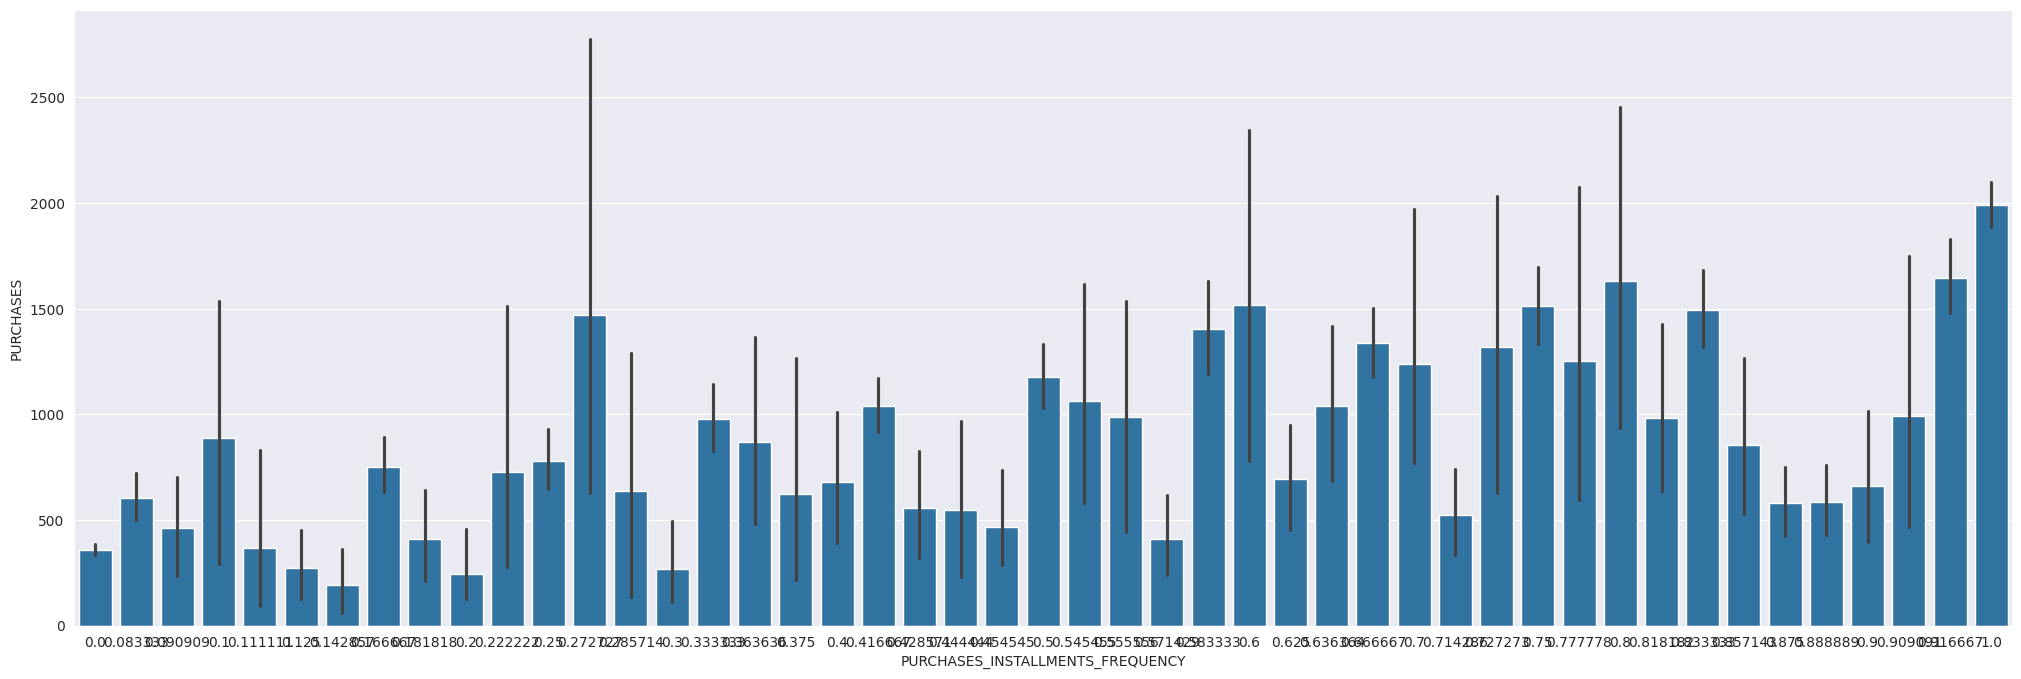

In [ ]:
sns.barplot(df_new2,x='PURCHASES_INSTALLMENTS_FREQUENCY',y='PURCHASES')



<Axes: >

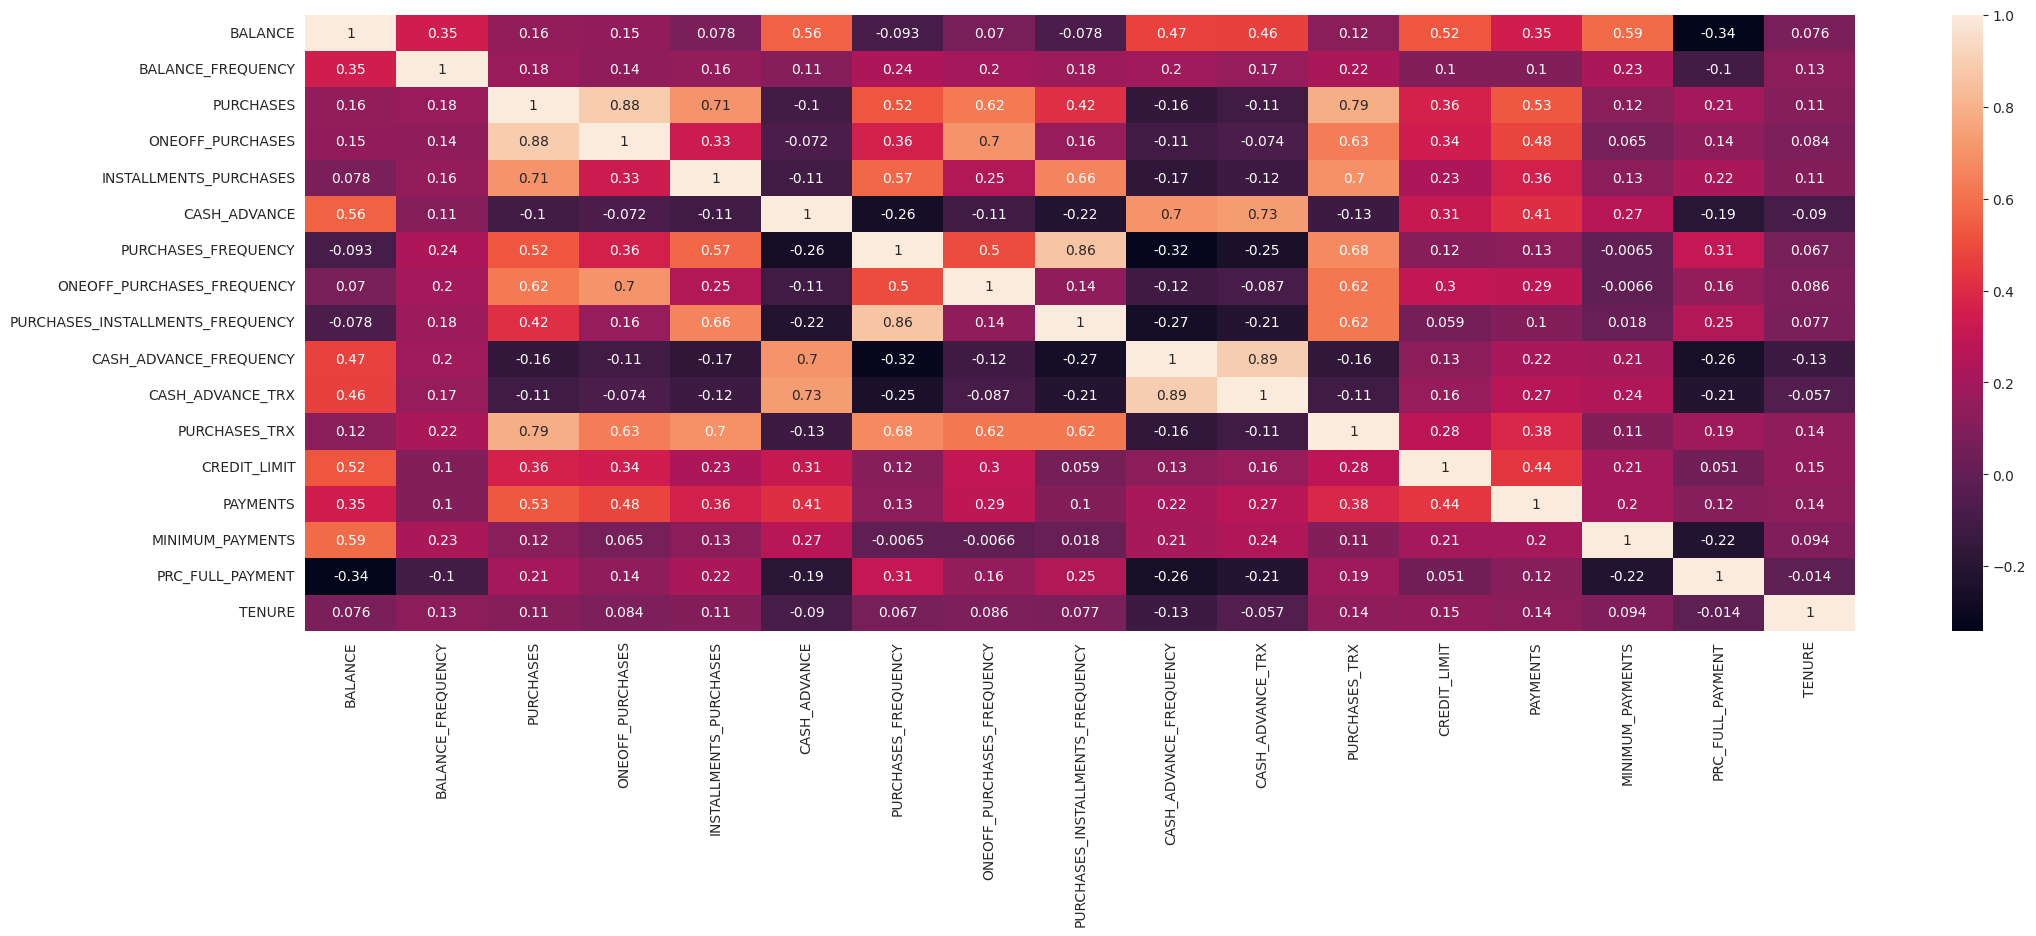

In [ ]:
sns.heatmap(df_new2.corr(),annot= True)

In [ ]:
vc = VarianceThreshold(threshold=0)
vc.fit(df_new2)

VarianceThreshold(threshold=0)

In [ ]:
vc.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
variance = df_new2.loc[:,vc.get_support() == False]
variance.columns

Index(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT'],
      dtype='object')

In [ ]:
df_new2.shape

(8950, 17)